In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
data = pd.read_csv('Train.csv')

In [134]:
data.head()

,ID,filename,growth_stage,damage,extent,season
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR2020
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR2021
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR2020
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR2020
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR2021


In [135]:
data['filename'].unique()

array(['L427F01330C01S03961Rp02052.jpg', 'L1083F00930C39S12674Ip.jpg',
       '24_initial_1_1463_1463.JPG', ...,
       'L134F00766C01S09784Rp26034.jpg',
       'L1153F02464C01S00194Rp01561.jpg',
       'L406F00362C01S00614Rp06760.jpg'], dtype=object)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26068 entries, 0 to 26067
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            26068 non-null  object
 1   filename      26068 non-null  object
 2   growth_stage  26068 non-null  object
 3   damage        26068 non-null  object
 4   extent        26068 non-null  int64 
 5   season        26068 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [137]:
data.isnull().sum()

ID              0
filename        0
growth_stage    0
damage          0
extent          0
season          0
dtype: int64

In [138]:
data['growth_stage'].unique()

array(['S', 'V', 'M', 'F'], dtype=object)

In [139]:
data['season'].unique()

array(['SR2020', 'SR2021', 'LR2020', 'LR2021'], dtype=object)

In [140]:
data['damage'].unique()

array(['WD', 'G', 'DR', 'ND', 'DS', 'PS', 'WN', 'FD'], dtype=object)

In [141]:
data['extent'].dtype

dtype('int64')

In [142]:
data.shape

(26068, 6)

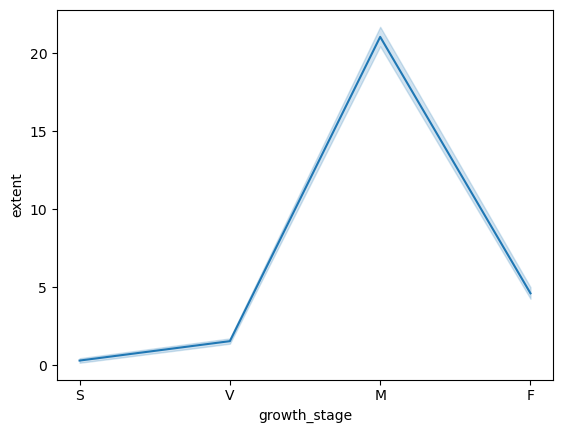

In [143]:
sns.lineplot(data=data, x='growth_stage', y='extent');

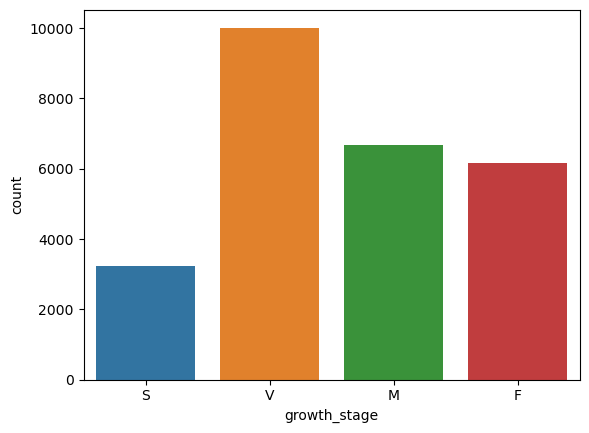

In [144]:
sns.countplot(data=data, x='growth_stage');

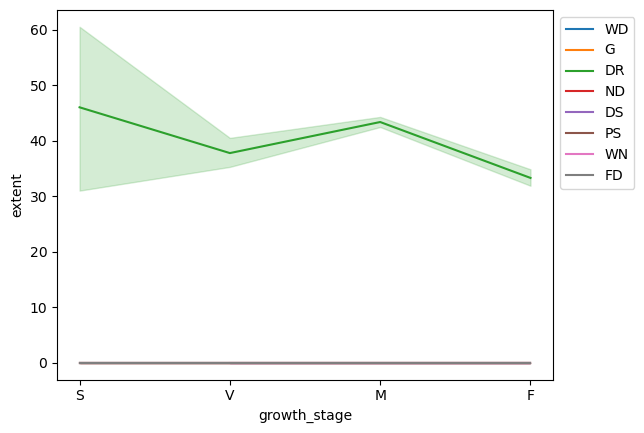

In [145]:
sns.lineplot(data=data, x='growth_stage', y='extent', hue='damage')
plt.legend(bbox_to_anchor = [1,1,0,0]);

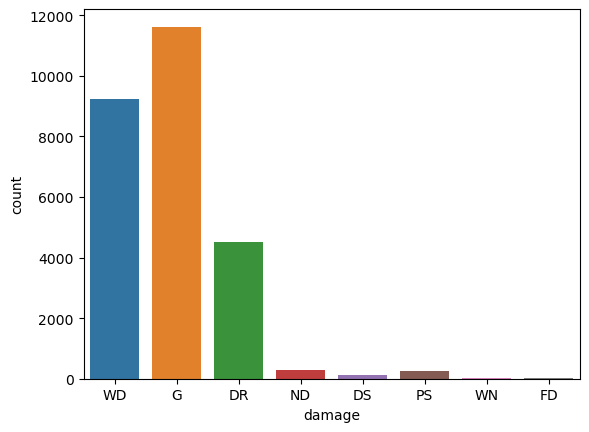

In [146]:
sns.countplot(data=data, x='damage');

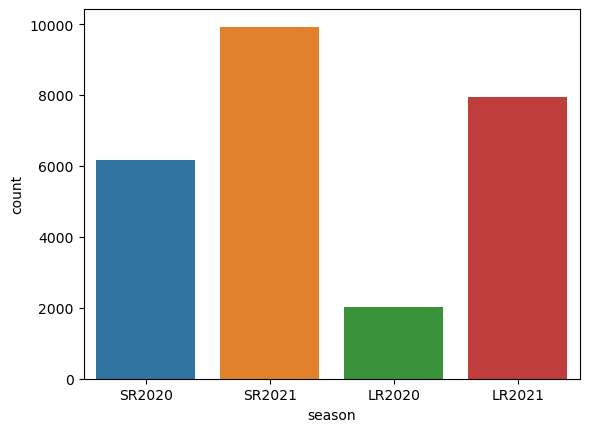

In [147]:
sns.countplot(data=data, x='season');

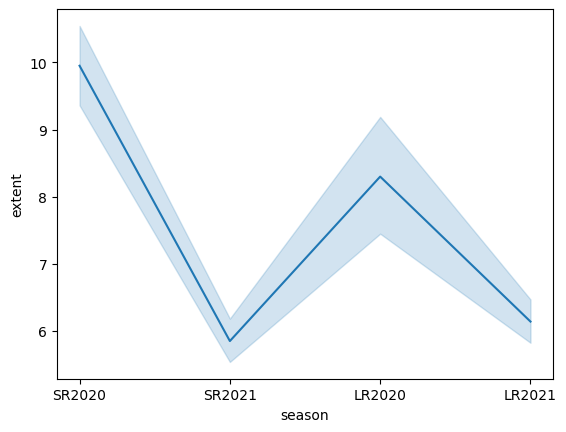

In [148]:
sns.lineplot(data=data, x='season', y='extent');

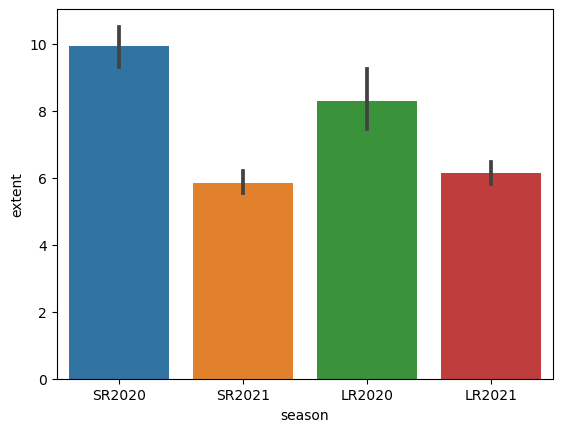

In [149]:
sns.barplot(data=data, x='season', y='extent');

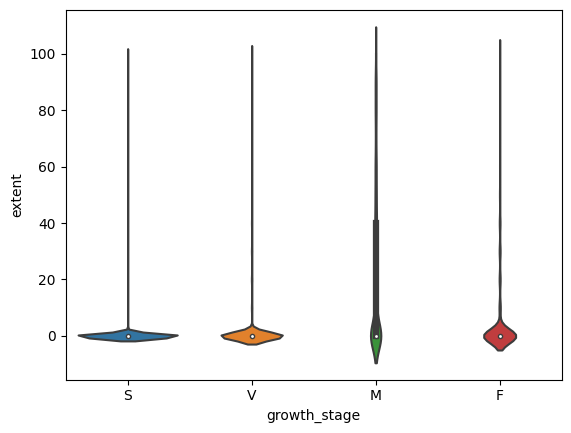

In [ ]:
sns.violinplot(data=data, x='growth_stage', y='extent');

In [150]:
data.columns

Index(['ID', 'filename', 'growth_stage', 'damage', 'extent', 'season'], dtype='object')

In [151]:
data =data.drop(['ID','filename'], axis=1)

In [152]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

In [153]:
categorical_columns

['growth_stage', 'damage', 'season']

In [154]:
df = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [155]:
df.head()

,extent,growth_stage_M,growth_stage_S,growth_stage_V,damage_DS,damage_FD,damage_G,damage_ND,damage_PS,damage_WD,damage_WN,season_LR2021,season_SR2020,season_SR2021
0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,1,0,0,0,0,0,0,0
3,60,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,1


In [156]:
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [157]:
# Create the feature matrix 'X' by dropping the 'wickets' column from 'new_df'
X = df.drop('extent', axis=1)

In [158]:
y = df['extent']
y= np.log1p(y)

In [159]:
# Split the data into training and testing sets
# X_train and y_train will be used for training the model
# X_test and y_test will be used for evaluating the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [160]:
# Define a custom loss function to penalize predictions of 0
def custom_loss(y_true, y_pred):
    # Calculate the mean squared error (MSE)
    mse = mean_squared_error(y_true, y_pred)
    
    # Penalize predictions of 0 by adding a large constant
    penalty = 100 * np.mean(np.square(y_pred[y_true == 0]))
    
    return mse + penalty

In [161]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)

In [162]:
# XGBoost Regressor
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)
xgb_predictions = xgb_regressor.predict(X_test)

In [163]:
# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)
gb_predictions = gb_regressor.predict(X_test)

In [164]:
# AdaBoost Regressor
adaboost_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4), n_estimators=100, learning_rate=0.1)
adaboost_regressor.fit(X_train, y_train)
adaboost_predictions = adaboost_regressor.predict(X_test)

In [165]:
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
dt_predictions = dt_regressor.predict(X_test)

In [166]:
# Evaluate the models
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
adaboost_r2 = r2_score(y_test, adaboost_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

In [167]:
print("Linear Regression R^2 Score:", linear_reg_r2)
print("XGBoost R^2 Score:", xgb_r2)
print("Gradient Boosting R^2 Score:", gb_r2)
print("AdaBoost R^2 Score:", adaboost_r2)
print("Decision Tree R^2 Score:", dt_r2)

Linear Regression R^2 Score: 0.9568303947334513
XGBoost R^2 Score: 0.9598764278291998
Gradient Boosting R^2 Score: 0.9546585278501145
AdaBoost R^2 Score: 0.8778582740682938
Decision Tree R^2 Score: 0.9597190240949538


In [168]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for each model
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
adaboost_rmse = np.sqrt(mean_squared_error(y_test, adaboost_predictions))
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))

In [169]:
print("Linear Regression RMSE:", linear_reg_rmse)
print("XGBoost RMSE:", xgb_rmse)
print("Gradient Boosting RMSE:", gb_rmse)
print("AdaBoost RMSE:", adaboost_rmse)
print("Decision Tree RMSE:", dt_rmse)

Linear Regression RMSE: 0.28984515051501725
XGBoost RMSE: 0.2794324220705133
Gradient Boosting RMSE: 0.2970467519988897
AdaBoost RMSE: 0.487538622502788
Decision Tree RMSE: 0.2799799886504031


In [170]:
df_pred = pd.DataFrame({'y_true':y_test, 'Linear Regression': linear_reg_predictions,
                   'XGBoost': xgb_predictions, 'Gradient Boosting': gb_predictions, 'AdaBoost': adaboost_predictions,
                   'Decision Tree': dt_predictions})

In [171]:
df_pred.head()

,y_true,Linear Regression,XGBoost,Gradient Boosting,AdaBoost,Decision Tree
1441,3.433987,3.531990,3.450055,3.582770,2.983636,3.449703
2464,0.000000,-0.018082,0.000075,0.011209,0.000000,0.000000
3023,0.000000,-0.048627,0.000068,0.011209,0.000000,0.000000
22605,0.000000,-0.020139,0.000037,0.014241,0.000000,0.000000
25163,0.000000,-0.004109,0.000045,0.011209,0.000000,0.000000


In [172]:
df_pred[df_pred['y_true'] == 0]

,y_true,Linear Regression,XGBoost,Gradient Boosting,AdaBoost,Decision Tree
2464,0.0,-0.018082,0.000075,0.011209,0.0,0.0
3023,0.0,-0.048627,0.000068,0.011209,0.0,0.0
22605,0.0,-0.020139,0.000037,0.014241,0.0,0.0
25163,0.0,-0.004109,0.000045,0.011209,0.0,0.0
1045,0.0,0.058072,0.002654,-0.013822,0.0,0.0
...,...,...,...,...,...,...
9710,0.0,0.045510,0.000011,0.014241,0.0,0.0
4010,0.0,0.027016,-0.000146,-0.013822,0.0,0.0
13709,0.0,-0.049700,0.000063,0.011209,0.0,0.0
12188,0.0,-0.021213,0.000110,0.014241,0.0,0.0


In [173]:
test_data = pd.read_csv('Test.csv')
test_df = pd.get_dummies(test_data.drop(['ID','filename'],axis=1), drop_first=True)

In [174]:
linear_reg_pred = linear_reg.predict(test_df)
xgb_pred = xgb_regressor.predict(test_df)
gb_pred = gb_regressor.predict(test_df)
ada_pred = gb_regressor.predict(test_df)
tree_pred = gb_regressor.predict(test_df)

In [175]:
test_pred = pd.DataFrame({'Linear Regression': linear_reg_pred,
                   'XGBoost':np.round(xgb_pred), 'Gradient Boosting':np.round(gb_pred),'AdaBoost': ada_pred, 'Decision_Tree': tree_pred})

In [177]:
test_pred[test_pred < 0] = 0

In [185]:
test_pred = np.round(test_pred).astype(int)

In [186]:
finalG = pd.DataFrame({'ID': test_data['ID'], 'extent': np.expm1(test_pred['Gradient Boosting'])})
finalT = pd.DataFrame({'ID': test_data['ID'], 'extent':np.expm1(test_pred['Decision_Tree'])})
finalA =pd.DataFrame({'ID': test_data['ID'], 'extent':np.expm1(test_pred['AdaBoost'])})
finalX =pd.DataFrame({'ID': test_data['ID'], 'extent':np.expm1(test_pred['XGBoost'])})
finalL = pd.DataFrame({'ID': test_data['ID'], 'extent':np.expm1(test_pred['Linear Regression'])})

In [187]:
finalT.isnull().sum()

ID        0
extent    0
dtype: int64

In [189]:
finalG.to_csv('finalgg', index = False)

In [191]:
finalT.to_csv('finalt', index = False)

In [192]:
finalA.to_csv('finala', index = False)

In [193]:
finalX.to_csv('finalx', index = False)

In [195]:
finalL.to_csv('finall', index = False)